# Video Game Sales Task

#### 1. Import pandas module as pd

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns    
import matplotlib.pyplot as plt

#### 2. Create variable vgs and read vgsales.csv file as dataframe in it

In [3]:
df = pd.read_csv("vgsales.csv")

#### 3. Get first 10 rows from the dataframe 

In [4]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


#### 4. Use info() method to know the information about number of entries in vgs dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### 5. Get average value of sales in Europe

In [6]:
df["EU_Sales"].mean()

0.14665200626581515

#### 6. Get the highest value of sales in Japan

In [7]:
df["JP_Sales"].max()

10.22

#### 7. What is the genre of "Brain Age 2: More Training in Minutes a Day" video game?

In [8]:

df[df["Name"] == "Brain Age 2: More Training in Minutes a Day"]["Genre"]

27    Puzzle
Name: Genre, dtype: object

#### 8. What is the amount of sales "Grand Theft Auto: Vice City" video game around the world?

In [9]:
df[df["Name"] == "Grand Theft Auto: Vice City"]["Global_Sales"]

24       16.15
13732     0.04
Name: Global_Sales, dtype: float64

#### 9. Get the name of the video game which has the highest sales in North America

In [10]:
df[df['NA_Sales'].max() == df['NA_Sales']]["Name"]

0    Wii Sports
Name: Name, dtype: object

#### 10. Get the name of video game which has the smallest sales around the world

In [11]:
df[df['Global_Sales'].min() == df['Global_Sales']]["Name"]

15980                                                Turok
15981                       Coven and Labyrinth of Refrain
15982    Super Battle For Money Sentouchuu: Kyuukyoku n...
15983                                     Dragon Zakura DS
15984                               Chameleon: To Dye For!
                               ...                        
16593                   Woody Woodpecker in Crazy Castle 5
16594                        Men in Black II: Alien Escape
16595     SCORE International Baja 1000: The Official Game
16596                                           Know How 2
16597                                     Spirits & Spells
Name: Name, Length: 618, dtype: object

#### 11. What is the average value of sales of all video games per genre in Japan?

In [12]:
df.groupby("Genre").mean(numeric_only=True)["JP_Sales"]

Genre
Action          0.048236
Adventure       0.040490
Fighting        0.103007
Misc            0.061967
Platform        0.147596
Puzzle          0.098471
Racing          0.045388
Role-Playing    0.236767
Shooter         0.029221
Simulation      0.073472
Sports          0.057702
Strategy        0.072628
Name: JP_Sales, dtype: float64

#### 12. How many unique names of video games in this dataframe?

In [13]:
df["Name"].nunique()

11493

#### 13. Get the 3 most common genres of video games worldwide

In [14]:
df["Genre"].value_counts().head(3)

Genre
Action    3316
Sports    2346
Misc      1739
Name: count, dtype: int64

#### 14. How many video games have "super" word in their names?

In [15]:
a = 0
for i in df["Name"]:
    if "Super" in i or "super" in i:
        a += 1
    
print(a)

385


### Визуализации

##### Количество игр

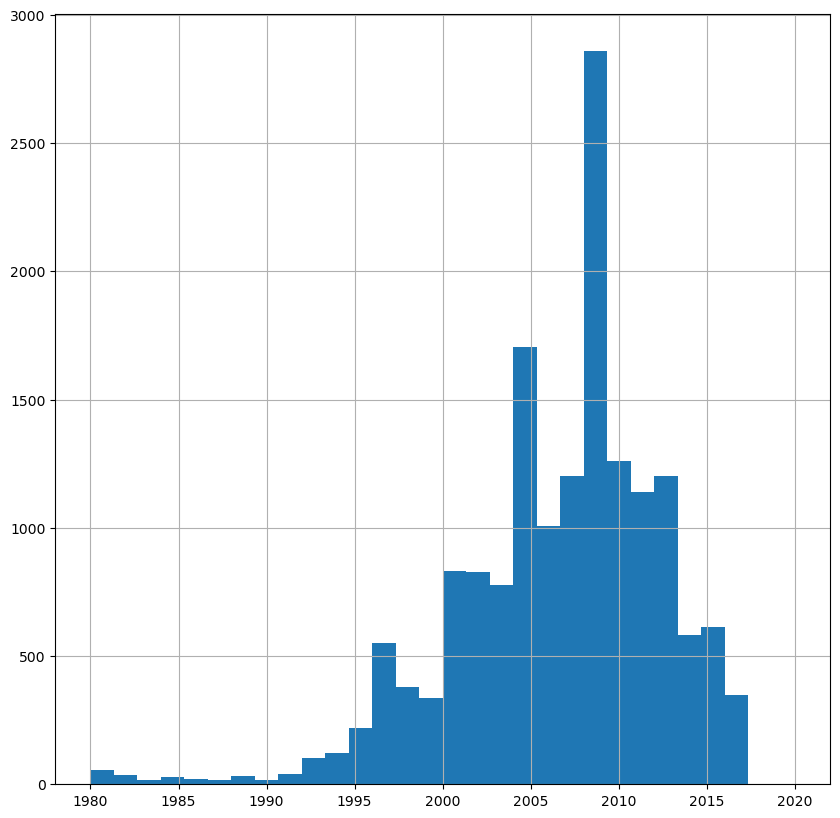

In [16]:
df["Year"].hist(figsize=(10, 10), bins=30);

##### Продажи игр по платформам

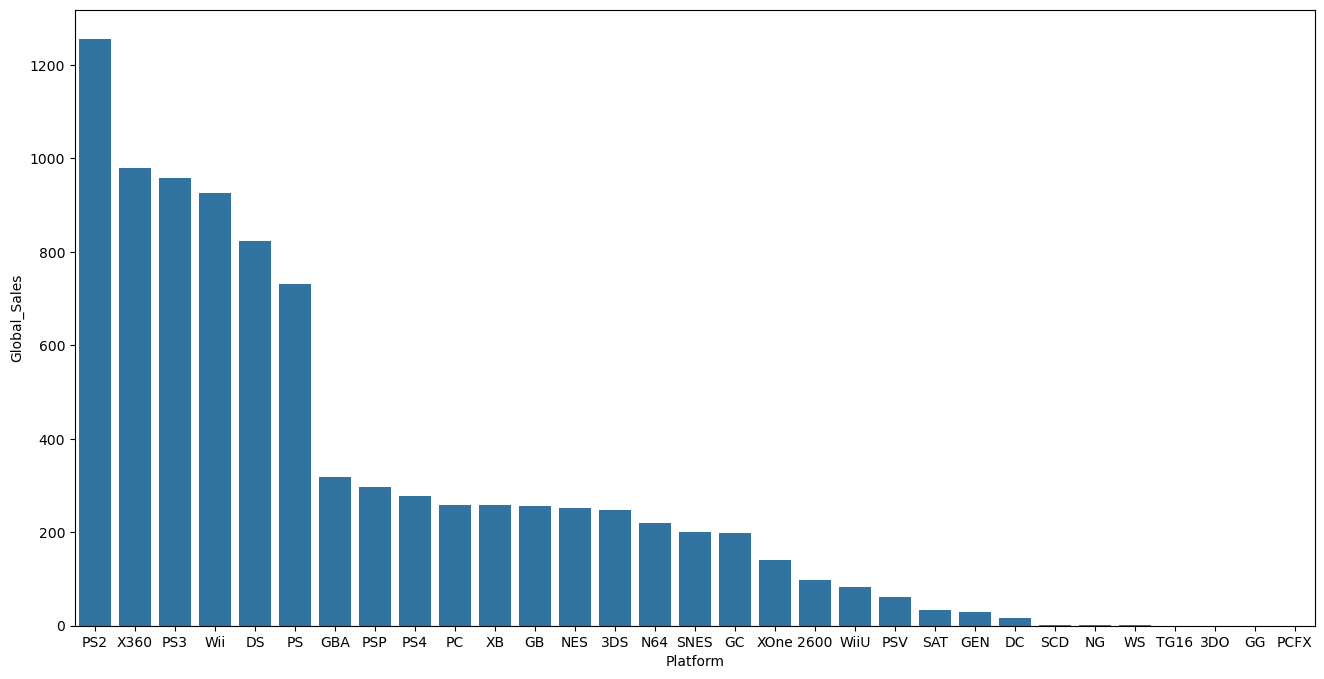

In [29]:
platforms = df.groupby('Platform')['Global_Sales'].sum().reset_index()
platforms = platforms.sort_values(by='Global_Sales', ascending=False)


plt.figure(figsize=(16, 8))
sns.barplot(data=platforms, x='Platform', y='Global_Sales');

### Продажи игр по жанрам

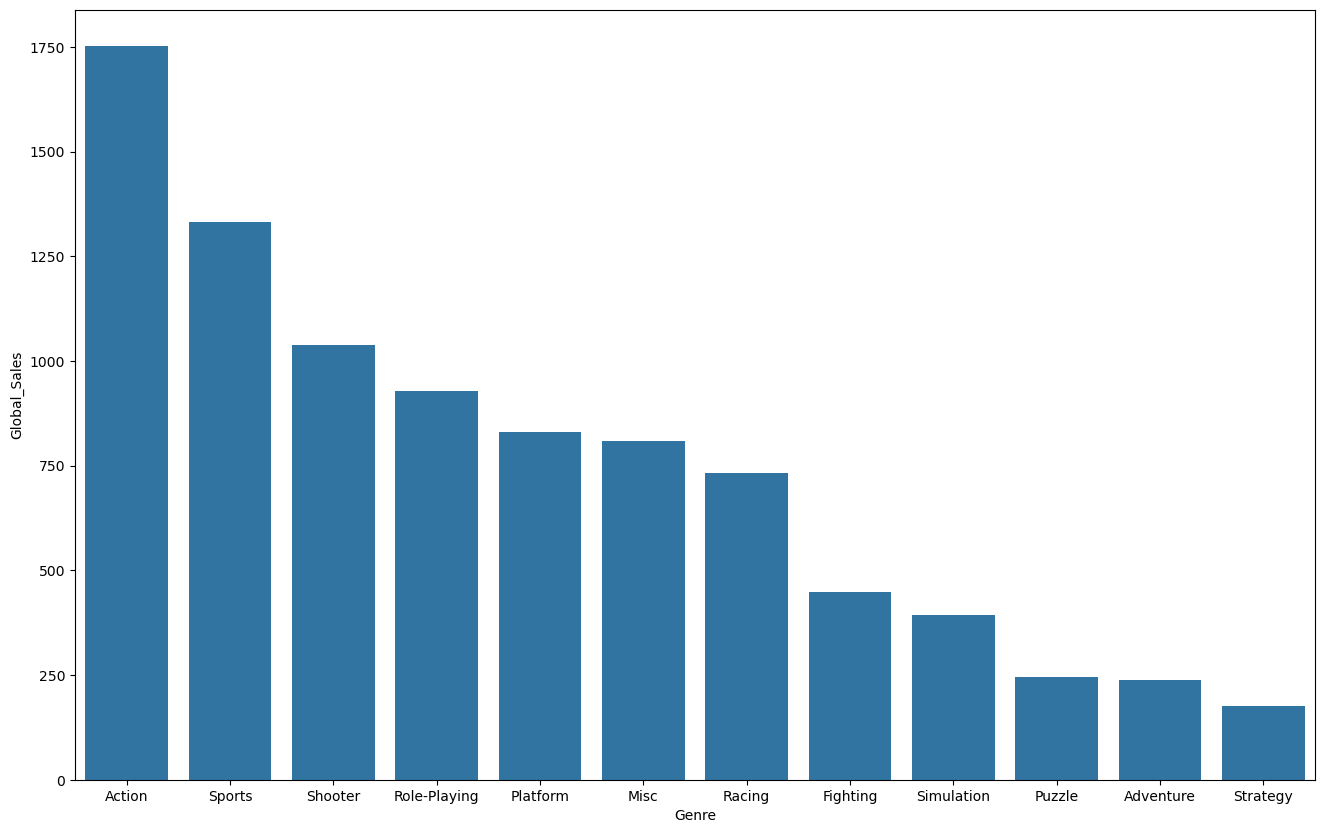

In [31]:
genres = df.groupby("Genre")["Global_Sales"].sum().reset_index()
genres = genres.sort_values(by="Global_Sales", ascending=False)


plt.figure(figsize=(16, 10))
sns.barplot(data=genres, x="Genre", y="Global_Sales");